# Storing and Managing Data [32245]

## Assignment 3: Persistence


<b>Serialization</b> (a.k.a. marshalling) is the process to store information about our objects into a stream e.g. a file. Python offer support for serialization in three different frameworks (with different capabilities)
* <b>Marshall</b> to support serialization of Python .pyc files
* <b>json</b> module, a library allowing JSON serialization and deserialization. This attends text based serialization but it is limited to certain data structures
* <b>Pickle</b> module is a library for binary serialization and deserialization and can handle most data structures

In addition, specific libraries may be able to offer some limited support to read and write specific file formats; for instance pandas can directly read json files.

Not ALL streams require serialization (e.g. the assignment of serial numbers to object) for storing.
* Extremely simple data e.g. plain text files or sequence of integers, are simply directly transcripted to the storing media with or without binarization. You can directly use pythons built-in readers and writers e.g. functions <code>open()</code> and <code>read()</code>

    Example: 
    <pre>f = open("example.txt", "r")
    print(f.read())</pre>

* Also, some more or less standard data structures such as images without metadata for instance, may be transcripted without serialization if some arrangement of the pixels or voxels can be predefined. You are very likely able to find standard support to read these in python. For instance, library imageio can directly read many image formats e.g. png.
    
    Example:
    <pre>import imageio
    im = imageio.imread('my_image.png')
    print(im.shape)</pre>

Nonetheless, there will be occasions in which you face the reading and writing of files for which there is no standard support. What will you do then? In such cases, it will be down to you to create your file reader and writers.

An example of file format for which there is no <i>standard</i> file reading/writing support is <b>AmiraMesh</b> files.

In this assignment, we will create an ad-hoc file reader for <b>AmiraMesh</b> files. 


# AmiraMesh

Amira is a software platform for 3D and 4D data visualization, processing, and analysis developed by Thermo Fisher Scientific in collaboration with the Zuse Institute Berlin (ZIB).

<b>AmiraMesh</b> is the native file format of Amira. The file itself describes an image mesh, but it offers great flexibility; AmiraMesh can deal with data of very different nature. To know more about the versatility of Amira and its file format AmiraMesh see https://en.wikipedia.org/wiki/Amira_(software). Given such vast functionality means that the file format has to accomodate very different types of information, which obviously result in a sophisticated file format.

Writing a generic AmiraMesh reader is of course feasible but certainly not straight forward. See for instance:

https://github.com/strawlab/py_amira_file_reader/blob/master/py_amira_file_reader/read_amira.py

However, writing an ad-hoc reader for one subset of AmiraMesh files is a more manageable project. An this is what we will achieve in this assignment.

An AmiraMesh file consists of a header and a data section. The header is always ASCII and contains the meta information such as grid type, bounding box, etc. The data section may be ASCII or binary.

You can find examples of AmiraMesh files here:
* ASCII data section: https://people.math.sc.edu/Burkardt/data/amiramesh/example.txt
* BINARY data section: https://www.csc.kth.se/~weinkauf/notes/amiramesh.html#:~:text=AmiraMesh%20is%20the%20native%20file,%2D%20Visualization%20Sciences%20Group%2C%20France.

In our case we shall work with an OCT image with a binary data section.


# Optical Coherence Tomography (OCT) 

Optical coherence tomography (OCT) is an imaging technique, typically employing near-infrared light, based on low-coherence interferometry. In OCT an optical beam is directed at the tissue, and a small portion of this light that reflects from sub-surface features is collected. Interferometry is used to record the optical path length of received photons allowing rejection of most photons that scatter multiple times. By rejecting diffuse light (i.e. multiple scattered), OCT can reconstruct clear 3D images of thick samples. 

OCT is a popular imaging tool with many applications. One of those applications, biomedical imaging OCT has proved very successful in medical domain areas such as ophthalmology or dermatology.

Some opthamologic OCT devices e.g. Triton (Topcon Europe Medical) do export the OCT images in AmiraMesh formats.

# Building an AmiraMesh reader for OCT images.

We now reach the core of the assignments. In this assignment you are going to build a simplified ad-hoc AmiraMesh file reader for OCT images. Download the AmiraMesh file provided in canvas and save it in the same folder were you are storing this Jupyter Notebook. You can of course store it anywhere you like but then remember to have the correct path in the filename below. If you open this file with any text editor e.g. notepad or other you will be able to see that you can read the header but the data section is a bunch of weird characters. This si because the second part of the file is binarized, so what your text editor is doing is assigniing ASCII or UNICODE characters to the binary stream which obviously looks like rubbish or encrypted content. Do not worry! The reader that we will create here will deal with that.

Our assignment is going to be organized in 2 classes. The first class will be the reader itself. The second class will simply be a test class. Both classes will be placed together in the same Jupyter Notebook file.


## The AmiraReader class

Our AmiraReader class will have one single private attribute <code>_filename</code> and the following methods:

* Constructor <code>__init__(self)</code>
* Three private methods;
** One for reading arrays <code>_fread(self,fid, nelements, dtype)</code> that return the data array
** One to parse the Amira file to check the existence of a field name: <code>_checkField(self,file, fieldName)</code> that returns thet line of the field name
** One to parse the Amira file to check the existence of a struct: <code>_checkStruct(self,file, structName)</code>
* One public method <code>readAmiraImage(self,filename)</code> that reads a set of OCT images from an Amira file and return a numpy <code>ndarray</code> shaped [width, height, nScans]

Let's get our hand dirty:

Let's start by importing some libraries:
Import below the following libraries
* <code>os</code> to handle filenames,
* <code>warnings</code> to yield error messages,
* <code>numpy</code> to use numerical arrays and
* <code>matplotlib</code> to later render the loaded image

In [62]:
#Import libraries
import os
import sys

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.figure import Figure

Declare below your class AmiraReader and its class constructor with the private attribute <code>_filename</code> initialized to an ampty string.

In [63]:
## Class definition
class AmiraReader(object):
    """A class to read Amira formatted files.

    A class to read Amira formatted files.

    .. seealso:: None
    .. note:: None
    """
    #Class constructor
    def __init__(self):
        """Class constructor"""
        
        # Initialize private attributes unique to this instance
        ##COMPLETE THIS PART
        self._filename = ""
        

Develop in the cell below the private method <code>_fread(self,fid, nelements, dtype)</code>. This method does the equivalent to Matlab's fread function. The parameters of this function are as follows:
* self - Is the AmiraReader object self reference
* fid - A logical file identifier as obtained with python built-in function <code>open()</code>
* nelements - Number of elements to be read at once
* dtype - Type of the element to be read.

The method ought to return a data array sized (1,nelements).

Hint: You can rely on <code>np.fromfile</code> to develop this method.


<span style="color:red"><b>NOTE</b>: Defining classes across cells in jupyter notebooks is not transparent. There exist several options to do so. See:</span>

https://stackoverflow.com/questions/45161393/jupyter-split-classes-in-multiple-cells

<span style="color:red">Here, we will stick to the second solution in the above link; creating "child" classes of the same name, e.g.</span>

<code>class AmiraReader(AmiraReader):</code>

<span style="color:red">Remember to add this formula in each of the cells below as appropriate</span>


In [64]:
class AmiraReader(AmiraReader):
    #some private methods
    def _fread(self,fid, nelements, dtype):
        """Equivalent to Matlab fread function"""
        if dtype is np.str_:
            dt = np.uint16  # WARNING: assuming 8-bit ASCII for np.str!
        else:
            dt = dtype
            
        ##COMPLETE THIS PART

        # Read the specified number of elements from the file
        data_array = np.fromfile(fid, dtype=dt, count=nelements)

        # Reshape the data array to the size (1, nelements)
        return data_array.reshape(1, nelements)
        

Develop in the cell below the private method <code>_checkField(self,fid, fieldName)</code>. This method parses the AmiraMesh file to find a field name. The parameters of this function are as follows:
* self - Is the AmiraReader object self reference
* fid - A logical file identifier as obtained with python built-in function <code>open()</code>
* fieldname - A string with the field name to be checked

The method ought to return True if the field exists or False otherwise.

Hint: You can rely on method <code>readline</code> from logical files objects to develop this method.

In [65]:
class AmiraReader(AmiraReader):
    def _findField(self,fid, fieldName):
        """Parses the Amira file to find a field name"""
        
        ##COMPLETE THIS PART
        for line in fid:
            if(fieldName in line):
                return line
        
        return None
    
class AmiraReader(AmiraReader):
    def _checkField(self,fid, fieldName):
        """Parses the Amira file to find a field name"""
        
        # Move the file pointer to the beginning of the file
        file.seek(0)

        # Read each line using readline and check for the struct name
        line = file.readline()
        while line:
            if structName in line:
                return True
            line = file.readline()

        # If the struct was not found, return False
        return False
    
        

Develop in the cell below the private method <code>_checkStruct(self,file, structName)</code>. This method parses the AmiraMesh file to find a struct. The parameters of this function are as follows:
* self - Is the AmiraReader object self reference
* fid - A logical file identifier as obtained with python built-in function <code>open()</code>
* strcutName - A string with the name of the struct to be checked

The method ought to return True if the field exists or False otherwise.

Hint: You can rely on method <code>readline</code> from logical files objects to develop this method.

In [66]:
class AmiraReader(AmiraReader):
    def _findStruct(self,fid, structName):
        """Parses the Amira file to find a struct"""
        
        ##COMPLETE THIS PART
        for line in fid:
            if(structName in line):
                return line
        return None    
    
class AmiraReader(AmiraReader):
    def _checkStruct(self,file, structName):
        """Parses the Amira file to find a struct"""
        
        ##COMPLETE THIS PART

  # Move the file pointer to the beginning of the file
        file.seek(0)

        # Read each line using readline and check for the struct name
        line = file.readline()
        while line:
            if structName in line:
                return True
            line = file.readline()

        # If the struct was not found, return False
        return False   

        

Develop in the cell below the public method <code>readAmiraImage(self,filename)</code>. This method reads a set of OCT scans from an Amira file. The parameters of this function are as follows:

* self: Is the AmiraReader object self reference
* filename: The Amira formatted file name including the path.

The method ought to return a numpy <code>ndarray</code> shaped [width, height, nScans]. Once this method is ready, it should be possible to use it as follows:

    Example
    r=AmiraReader()
    fileName = 'imageFileName.am'
    img = r.readAmiraImage(fileName)


You will also need to extend the previous two method <code>_checkField</code> and <code>_checkStruct</code> to allow them return the field/struct searched instead of simply checking the existence.
    

This is by far the most complex part of the assignment. A suggested "algorithm" to follow for this function is as follows:

* Store the filename in the class attribute <code>_filename</code>
* Open the file
* Read the AmiraMesh header line with the help of a method <code>_findField</code> that extends the <code>_checkField</code>
** Parse the opening line (find whether the incoming data is 2D or 3D, whether the data section is BINARY or ASCII and the file version)
* Read the rest of the header with the help of methods <code>_findField</code> and <code>_findStruct</code> (which extends the <code>_checkStruct</code>)
* Locate the data section with the help of method <code>_findField</code>
* Read the data section

In [67]:
class AmiraReader(AmiraReader):
    # Public methods
    def readAmiraImage(self, filename):
        """Reads a set of OCT images from an Amira file.

        The function does not check whether the file is formatted as an
        Amira file. It is simply assumed to be so.

        :Example:
            from AmiraReader import AmiraReader
            r = AmiraReader()
            fileName = 'imageFolder\\FileName.am'
            img = r.readAmiraImage(fileName)

        :Raises:
            TypeError: When data is neither 2D nor 3D or the format is not binary.

        :param filename: The Amira formatted file name including the path.
        :type filename: string
        :returns: A set of (equally shaped) OCT scans
        :rtype: An ndarray shaped [width, height, nScans]
        """
        self._filename = filename
        nDims = 0
        formatFile = ''
        version = ''
        parameters = []
        dataType = []

        # Open the file
        with open(filename, 'rb') as _file:   #'rb' means "read binary," indicating that the file is opened in binary read mode
            while True:
                lineString = self._findField(_file, b'AmiraMesh')
                 ##COMPLETE THIS PART
                 # Split the lineString into words
                string_split = lineString.split()
                if '3D' in string_split:    #Check for '3D' in the split string and set the dimension variable accordingly
                    nDims = 3
                if 'BINARY' in string_split:   # Check for 'BINARY' in the split string and set the file format variable
                    formatFile = 'BINARY'
                if '2.0' in string_split:      # Check for version '2.0' in the split string and set the version variable
                    version = 2.0
                find_lattice = self._findField(_file, b'define Lattice')     # Find and process the lattice definition line
                split_lattice = find_lattice.split()
                width = int(split_lattice[2])        # Parse width from the lattice line
                height = int(split_lattice[3])        # Parse height from the lattice line
                nScans = int(split_lattice[4])        # Parse number of scans from the lattice line
                # Find and process the data type definition line
                find_dtype = self._findField(_file, b'Lattice')
                split_dtype = find_dtype.split()
                dtype = split_dtype[2]  # Extract the data type
                dtype = str(dtype)        # Convert data type to string
                dtype = dtype[2][2:-1]    # Further process the string to get the correct format
                dtype =f'np.{dtype}'     # Format the dtype string to be used with numpy
                
                temp = self._findField(_file, b"Data section")
                ##COMPLETE THIS PART
                if temp:
                    break          # If the 'Data section' marker is found, exit the loop
                break             
            # Read the data from the file using the calculated dimensions and data type
            data = self._fread(_file, width * height * nScans, np.ushort)
            A = data.reshape(width, height, nScans)       #Reshape the data into a 3D array based on width, height, and number of scans

        return A  # Variable A is an ndarray shaped [width, height, nScans] with the OCT scans

# The Test class

Let's now work on the second class. The Test class will only have one method (the <code>main</code> method). The main method in this class will have no parameters. It will be the one responsible for:

1) Creating an AmiraReader object

2) Read the AmiraMesh OCT file

3) Report the size of the image [width, height, nScans], and

4) Plot the 3rd OCT scan (indexed 0, so that's the 4th really) using matplotlib. Use the grayscale colourmap.

In the cell below, create the Test class and its main method

In [68]:
class Test:
    def main():
        
        #1) Creating an AmiraReader object
        r=AmiraReader()
        #2) Read the AmiraMesh OCT file
        fileName = 'Example001.am'
        img = r.readAmiraImage(fileName)
        
        ##COMPLETE THIS PART
        #3) Report the size of the image [width, height, nScans], and
        if img is not None:
            width, height, nScans = img.shape
            print(f"Image size: Width = {width}, Height = {height}, nScans = {nScans}")
        else:
            print("Failed to read the image or image is empty.")
            return
        #4) Plot the 3rd OCT scan (indexed 0, so that's the 4th really) using matplotlib. Use the grayscale colourmap.
        if nScans > 3:
            plt.imshow(img[:,:,3], cmap='gray')
            plt.title("4th OCT Scan")
            plt.colorbar()
            plt.show()
        else:
            print("The image does not have a 4th scan.")
            

Finally, add the python entry point <code>if __name__ == "__main__":</code> and call the main method in the class Test.

Image size: Width = 512, Height = 992, nScans = 256


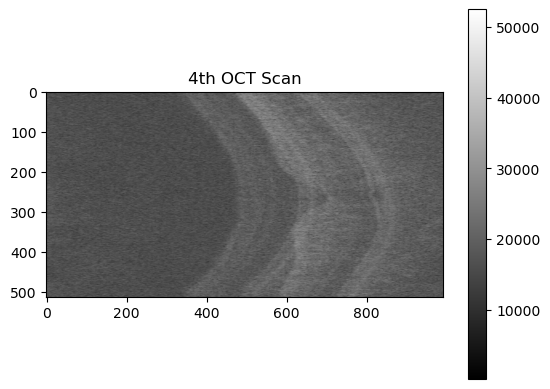

In [69]:
if __name__ == "__main__":
    ##COMPLETE THIS PART
    Test.main()

Information : I have already highlighted the issue to Professor Tao that these codes are running fine in the anaconda notebook but it might face difficulty in running the university server but i have already made all the neccesary changes as required by university server' s version and hopefully it will run in that too.

Also I tried and added comments after every code to make sure that i can explain why i wrote this code.